In [1]:
import seaborn as sns
import metapack as mp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display 

%matplotlib inline
sns.set_context('notebook')
mp.jupyter.init()


In [2]:
pkg = mp.jupyter.open_package()
#pkg = mp.jupyter.open_source_package()
pkg

# Homicides in California
`openjustice.doj.ca.gov-homicide-1.1.1` Last Update: 2020-06-16T22:37:58

_Homicides reported to the California DOJ by local law enforcement._


The Homicides in California file is publilshed by the California Department of Justices's [Open Justice](https://openjustice.doj.ca.gov) site. It collects reports from local law enformcement. From the website: 

> Information on homicides in California are reported by various LEAs as part of
> the reporting requirements for the Federal Uniform Crime Reporting (UCR)
> Program. These data provide detailed information about the circumstances of
> each homicide in addition to personal characteristics of the victim.

## Processing

The value label files were manually extracted from the data dictionary PDF. These files can be merged with the main homicide files to add human readable
labels to the values for these columns: 

* precipitating_event
* means_of_death
* location
* gender
* relationship
* race_ethnicity

The `race_ethnicity` column has two codes that map to the same race label for many race labels. For instance, both '1' and 'W' are codes for the label 'White'. These duplicate numeric codes have been replaced with the associated alpha code.
## Documentation Links

* [Data documentation](https://data-openjustice.doj.ca.gov/sites/default/files/dataset/2019-07/Homicide%20Context_062419.pdf) Data documentation and data dictionary
* [Homicide in California in 2019](https://data-openjustice.doj.ca.gov/sites/default/files/2019-07/Homicide%20In%20CA%2020190701.pdf) Report based on this dataset.
* [Data download page](https://openjustice.doj.ca.gov/data) 
* [Open Justice Home Page](https://openjustice.doj.ca.gov/) 

 

## Contacts

* **Wrangler** [Eric Busboom](mailto:eric@civicknowledge.com), [Civic Knowledge](http://civicknowledge.com)

## Resources

* ** [homicides](data/homicides.csv)**. California homicides
* ** [homicide_justifiable](data/homicide_justifiable.csv)**. California justifiable homicides
* ** [homicide_manslaughter](data/homicide_manslaughter.csv)**. California manslaughter homicides
* ** [precipitating_event_labels](data/precipitating_event_labels.csv)**. Value labels for the Precipitating Event column
* ** [means_of_death_labels](data/means_of_death_labels.csv)**. Value labels for the means_of_death column
* ** [location_labels](data/location_labels.csv)**. Value labels for the location column
* ** [gender_labels](data/gender_labels.csv)**. Value labels for the gender column
* ** [relationship_labels](data/relationship_labels.csv)**. Value labels for the relationship column
* ** [race_ethnicity_labels](data/race_ethnicity_labels.csv)**. Value labels for the race_ethnicity column

## References
<ul><li> <strong>vl_source</string>, <em>data/value_labels.csv</em>. Data dictionary, extracted from the data ditionary pdf</li><li> <strong><a href="https://data-openjustice.doj.ca.gov/sites/default/files/dataset/2019-06/Homicide%20_Actuals_1987-2018.csv">homicides_s</a></strong>. California homicides</li><li> <strong><a href="https://data-openjustice.doj.ca.gov/sites/default/files/dataset/2019-06/Homicide_Justifiable_1987-2018.csv">homicide_justifiable_s</a></strong>. California justifiable homicides</li><li> <strong><a href="https://data-openjustice.doj.ca.gov/sites/default/files/dataset/2019-06/Homicide_Manslaughter_1987-2018.csv">homicide_manslaughter_s</a></strong>. California manslaughter homicides</li><ul>

In [3]:
df = pkg.resource('homicides').dataframe()
df.dtypes

county                             Int64
jurisdiction_ncic                 object
bcs_number                         Int64
victim_number                      Int64
month_of_report                    Int64
year_of_report                     Int64
total_victim                       Int64
total_suspects                     Int64
gender                             Int64
race_ethnicity                    object
age                                Int64
crime_status                       Int64
victim_offender_relationship_1     Int64
victim_offender_relationship_2     Int64
victim_offender_relationship_3     Int64
victim_offender_relationship_4     Int64
month_of_incident                  Int64
day_of_month_of_incident           Int64
year_of_incident                   Int64
day_of_week                        Int64
year_of_death                      Int64
means_of_death                     Int64
location                           Int64
precipitating_event                Int64
special_circumst

In [4]:
df.race_ethnicity.value_counts()

H    34152
B    23229
W    17524
O     1620
A     1321
F      460
I      371
V      353
X      332
C      257
K      200
P      135
Z      124
S       90
D       88
J       84
U       69
L       63
G       12
Name: race_ethnicity, dtype: int64

In [5]:
race_ethnicity_labels = pkg.resource('race_ethnicity_labels').dataframe()
relationship_labels = pkg.resource('relationship_labels').dataframe()
means_of_death_labels = pkg.resource('means_of_death_labels').dataframe()
location_labels = pkg.resource('location_labels').dataframe()
gender_labels = pkg.resource('gender_labels').dataframe() 
precipitating_event_labels = pkg.resource('precipitating_event_labels').dataframe()

In [6]:
race_ethnicity_labels

,race_ethnicity,race_ethnicity_label
0,0,Unknown
1,X,Unknown
2,1,White
3,W,White
4,2,Hispanic
5,H,Hispanic
6,3,Black
7,B,Black
8,4,American Indian
9,I,American Indian


In [7]:
dm = df\
    .merge(race_ethnicity_labels)\
    .merge(location_labels)\
    .merge(means_of_death_labels)\
    .merge(precipitating_event_labels)

dm.means_of_death_label.value_counts()

Handgun (pistol/revolver)             45822
Knife or other stabbing instrument    11121
Firearm (not specified)                4642
Personal weapon (hands/feet, etc)      4095
Blunt object                           3934
Shotgun                                2831
Rifle                                  2797
Rope/Garrote                           1591
Unknown                                1040
Other                                   921
Asphyxiation                            578
Arson/Fire                              509
Drowning                                176
Drugs/Narcotics (overdose)              123
Neglect                                 114
Other firearm                            72
Poison                                   66
Explosion                                28
Pellet gun                                8
Name: means_of_death_label, dtype: int64

In [8]:
df.location.value_counts()

16    30017
2     15061
15     6664
24     5982
13     4767
6      3507
19     3127
3      1944
7      1794
18     1744
14     1325
99     1055
0      1040
1       938
4       501
17      328
5       226
25      164
12      120
20      112
8        48
22       16
21        4
Name: location, dtype: int64

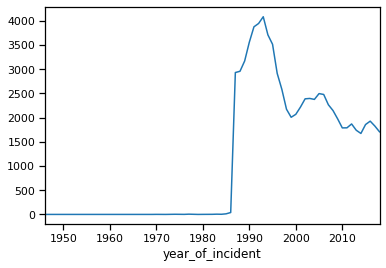

In [9]:
df.groupby('year_of_incident').bcs_number.count().plot()

In [12]:

agencies = mp.open_package('index:openjustice.doj.ca.gov-agencies')
agencies

# California Law Enforcement Agencies
`openjustice.doj.ca.gov-agencies-1.1.1` Last Update: 2020-06-16T23:34:30

_California's county and agency level context data_




 

## Contacts

* **Wrangler** [Eric Busboom](mailto:eric@civicknowledge.com), [Civic Knowledge](http://civicknowledge.com)

## Resources

* ** [ca_lea](data/ca_lea.csv)**. California Law Enforcement Agencies and demographic statistics for their service areas.

In [13]:
ca_lea = agencies.resource('ca_lea').dataframe()
ca_lea = ca_lea[['agency_code', 'agency_name']].drop_duplicates()

In [19]:
ca_lea.head(20)

,year,county,agency_name,agency_code,less_than_high_school,high_school_or_higher,bachelors_or_higher,per_capita_income,median_income,poverty_rate,employment_rate,unemployment_rate
0,2009,Alameda,All Combined,All Combined,14.1,85.7,39.9,33831,68863,23.4,61.6,7.7
1,2009,Alameda,Alameda Police Department,101,9.0,91.1,45.4,38809,73503,17.9,62.4,7.0
2,2009,Alameda,Albany Police Department,102,6.2,94.8,69.8,35982,72516,18.9,65.4,5.1
3,2009,Alameda,Berkeley Police Department,103,2.7,93.6,67.4,36798,59097,24.5,56.3,6.7
4,2009,Alameda,Dublin Police Department,130,17.1,91.0,43.1,40092,108711,22.4,61.2,6.0
5,2009,Alameda,Emeryville Police Department,104,0.0,95.9,69.4,49376,57211,19.6,66.1,4.6
6,2009,Alameda,Fremont Police Department,105,12.5,91.0,49.0,37545,95028,19.8,64.1,5.9
7,2009,Alameda,Hayward Police Department,106,17.0,79.6,22.9,24803,61001,26.0,61.3,9.2
8,2009,Alameda,Livermore Police Department,107,11.1,91.3,36.2,40195,94530,26.5,67.3,6.6
9,2009,Alameda,Newark Police Department,108,7.1,83.8,30.0,29718,82782,20.4,63.2,7.7
